In [1]:
import os
from dotenv import load_dotenv

load_dotenv()

True

In [2]:
os.getenv('OPENAI_API_KEY')
os.getenv('TAVILY_API_KEY')

In [8]:
from datetime import datetime

# Current timestamp
current_timestamp = datetime.now()
str_time = current_timestamp.strftime("%Y-%m-%d %H:%M:%S")
print(str_time)
print(datetime.now().timestamp())

2025-01-23 18:05:01
1737651901.986919


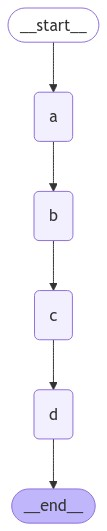

In [10]:
from IPython.display import display, Image
from typing import Any, TypedDict
from langgraph.graph import StateGraph, START, END

class State(TypedDict):
    # Without the operator .add reducer function this will overwrite the state.
    # The operator .add reducer function makes this append-only
    state: str

class ReturnNodeValue:
    def __init__(self, node_secret: str):
        self._value = node_secret
    
    def __call__(self, state: State) -> Any:
        print(f"Adding {self._value} to {state['state']}")
        return {"state": [(self._value, datetime.now())]}

# Add nodes
builder = StateGraph(State)

# Initialize each node with node_secret
builder.add_node("a", ReturnNodeValue("I'm A"))
builder.add_node("b", ReturnNodeValue("I'm B"))
builder.add_node("c", ReturnNodeValue("I'm C"))
builder.add_node("d", ReturnNodeValue("I'm D"))

builder.add_edge(START, "a")
builder.add_edge("a", "b")
builder.add_edge("b", "c")
builder.add_edge("c", "d")
builder.add_edge("d", END)
graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [11]:
graph.invoke({"state": []})

Adding I'm A to []
Adding I'm B to [("I'm A", datetime.datetime(2025, 1, 23, 18, 6, 2, 479151))]
Adding I'm C to [("I'm B", datetime.datetime(2025, 1, 23, 18, 6, 2, 479818))]
Adding I'm D to [("I'm C", datetime.datetime(2025, 1, 23, 18, 6, 2, 480421))]


{'state': [("I'm D", datetime.datetime(2025, 1, 23, 18, 6, 2, 480993))]}

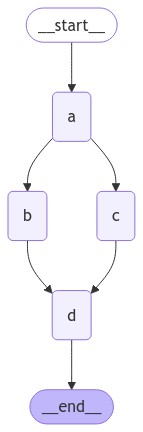

In [12]:
# Add nodes
par_builder = StateGraph(State)

# Initialize each node with node_secret
par_builder.add_node("a", ReturnNodeValue("I'm A"))
par_builder.add_node("b", ReturnNodeValue("I'm B"))
par_builder.add_node("c", ReturnNodeValue("I'm C"))
par_builder.add_node("d", ReturnNodeValue("I'm D"))

par_builder.add_edge(START, "a")
par_builder.add_edge("a", "b")
par_builder.add_edge("a", "c")
par_builder.add_edge("b", "d")
par_builder.add_edge("c", "d")
par_builder.add_edge("d", END)

par_graph = par_builder.compile()

display(Image(par_graph.get_graph().draw_mermaid_png()))


In [13]:
from langgraph.errors import InvalidUpdateError
try:
    par_graph.invoke({"state": []})
except InvalidUpdateError as e:
    print(f"An error  occurred: {e}")

Adding I'm A to []
Adding I'm B to [("I'm A", datetime.datetime(2025, 1, 23, 18, 6, 38, 358175))]
Adding I'm C to [("I'm A", datetime.datetime(2025, 1, 23, 18, 6, 38, 358175))]
An error  occurred: At key 'state': Can receive only one value per step. Use an Annotated key to handle multiple values.


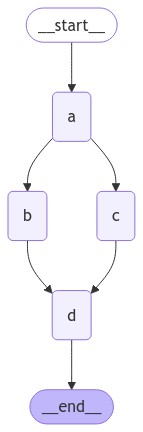

In [15]:
import operator
from typing import Annotated, Any

class AnnotatedState(TypedDict):
    # For lists the add operator actually appends
    state: Annotated[list, operator.add]


# Add nodes
par2_builder = StateGraph(AnnotatedState)

# Initialize each node with node_secret
par2_builder.add_node("a", ReturnNodeValue("I'm A"))
par2_builder.add_node("b", ReturnNodeValue("I'm B"))
par2_builder.add_node("c", ReturnNodeValue("I'm C"))
par2_builder.add_node("d", ReturnNodeValue("I'm D"))

par2_builder.add_edge(START, "a")
par2_builder.add_edge("a", "b")
par2_builder.add_edge("a", "c")
par2_builder.add_edge("b", "d")
par2_builder.add_edge("c", "d")
par2_builder.add_edge("d", END)

par2_graph = par2_builder.compile()

display(Image(par2_graph.get_graph().draw_mermaid_png()))

In [16]:
try:
    par2_graph.invoke({"state": []})
except InvalidUpdateError as e:
    print(f"An error occurred: {e}")

Adding I'm A to []
Adding I'm B to [("I'm A", datetime.datetime(2025, 1, 23, 18, 7, 36, 138320))]
Adding I'm C to [("I'm A", datetime.datetime(2025, 1, 23, 18, 7, 36, 138320))]
Adding I'm D to [("I'm A", datetime.datetime(2025, 1, 23, 18, 7, 36, 138320)), ("I'm B", datetime.datetime(2025, 1, 23, 18, 7, 36, 138754)), ("I'm C", datetime.datetime(2025, 1, 23, 18, 7, 36, 139450))]


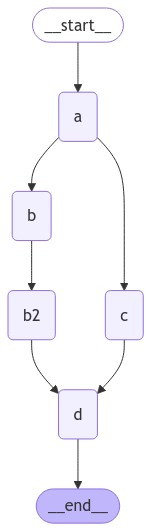

In [18]:
builder = StateGraph(AnnotatedState)

# Initialize each node with node_secret 
builder.add_node("a", ReturnNodeValue("I'm A"))
builder.add_node("b", ReturnNodeValue("I'm B"))
builder.add_node("b2", ReturnNodeValue("I'm B2"))
builder.add_node("c", ReturnNodeValue("I'm C"))
builder.add_node("d", ReturnNodeValue("I'm D"))

# Flow
builder.add_edge(START, "a")
builder.add_edge("a", "b")
builder.add_edge("a", "c")
builder.add_edge("b", "b2")
builder.add_edge(["b2", "c"], "d")
builder.add_edge("d", END)
graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [19]:
graph.invoke({"state": []})

Adding I'm A to []
Adding I'm B to [("I'm A", datetime.datetime(2025, 1, 23, 21, 6, 35, 230855))]
Adding I'm C to [("I'm A", datetime.datetime(2025, 1, 23, 21, 6, 35, 230855))]
Adding I'm B2 to [("I'm A", datetime.datetime(2025, 1, 23, 21, 6, 35, 230855)), ("I'm B", datetime.datetime(2025, 1, 23, 21, 6, 35, 232740)), ("I'm C", datetime.datetime(2025, 1, 23, 21, 6, 35, 234198))]
Adding I'm D to [("I'm A", datetime.datetime(2025, 1, 23, 21, 6, 35, 230855)), ("I'm B", datetime.datetime(2025, 1, 23, 21, 6, 35, 232740)), ("I'm C", datetime.datetime(2025, 1, 23, 21, 6, 35, 234198)), ("I'm B2", datetime.datetime(2025, 1, 23, 21, 6, 35, 235582))]


{'state': [("I'm A", datetime.datetime(2025, 1, 23, 21, 6, 35, 230855)),
  ("I'm B", datetime.datetime(2025, 1, 23, 21, 6, 35, 232740)),
  ("I'm C", datetime.datetime(2025, 1, 23, 21, 6, 35, 234198)),
  ("I'm B2", datetime.datetime(2025, 1, 23, 21, 6, 35, 235582)),
  ("I'm D", datetime.datetime(2025, 1, 23, 21, 6, 35, 236234))]}

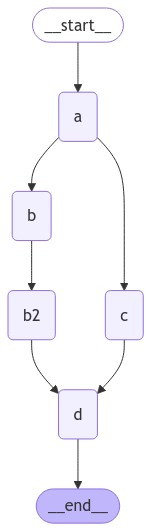

In [20]:
def sorting_reducer(left, right):
    """ Combines and sorts the values in a list """
    if not isinstance(left, list):
        left = [left]

    if not isinstance(right, list):
        right = [right]

    # "sorted" performs a lexicographic comparison character by character
    return sorted(left + right, reverse=False)

class StateWithCustomReducer(TypedDict):
    # sorting_reducer will sort the values in the state
    state: Annotated[list, sorting_reducer]

# Add nodes
builder = StateGraph(StateWithCustomReducer)

# Initialize each node with node_secret 
builder.add_node("a", ReturnNodeValue("I'm A"))
builder.add_node("b", ReturnNodeValue("I'm B"))
builder.add_node("b2", ReturnNodeValue("I'm B2"))
builder.add_node("c", ReturnNodeValue("I'm C"))
builder.add_node("d", ReturnNodeValue("I'm D"))

# Flow
builder.add_edge(START, "a")
builder.add_edge("a", "b")
builder.add_edge("a", "c")
builder.add_edge("b", "b2")
builder.add_edge(["b2", "c"], "d")
builder.add_edge("d", END)
graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [21]:
graph.invoke({"state": []})

Adding I'm A to []
Adding I'm B to [("I'm A", datetime.datetime(2025, 1, 23, 21, 13, 14, 579000))]
Adding I'm C to [("I'm A", datetime.datetime(2025, 1, 23, 21, 13, 14, 579000))]
Adding I'm B2 to [("I'm A", datetime.datetime(2025, 1, 23, 21, 13, 14, 579000)), ("I'm B", datetime.datetime(2025, 1, 23, 21, 13, 14, 580431)), ("I'm C", datetime.datetime(2025, 1, 23, 21, 13, 14, 581576))]
Adding I'm D to [("I'm A", datetime.datetime(2025, 1, 23, 21, 13, 14, 579000)), ("I'm B", datetime.datetime(2025, 1, 23, 21, 13, 14, 580431)), ("I'm B2", datetime.datetime(2025, 1, 23, 21, 13, 14, 583103)), ("I'm C", datetime.datetime(2025, 1, 23, 21, 13, 14, 581576))]


{'state': [("I'm A", datetime.datetime(2025, 1, 23, 21, 13, 14, 579000)),
  ("I'm B", datetime.datetime(2025, 1, 23, 21, 13, 14, 580431)),
  ("I'm B2", datetime.datetime(2025, 1, 23, 21, 13, 14, 583103)),
  ("I'm C", datetime.datetime(2025, 1, 23, 21, 13, 14, 581576)),
  ("I'm D", datetime.datetime(2025, 1, 23, 21, 13, 14, 584085))]}

In [26]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-4o", temperature=0)

In [27]:
class State(TypedDict):
    question: str
    answer: str
    context: Annotated[list, operator.add]

In [36]:
from langchain_core.prompts import ChatPromptTemplate, PromptTemplate
from langchain_core.documents import Document
from langchain_core.messages import HumanMessage, SystemMessage

#question = "Who am I"
#context = "That is Robin Hood"
#answer_template = """Answer the question {question} using this context: {context}""".format(question=question, context=context)
#print(answer_template)

#    # Template
#    answer_template = """Answer the question {question} using this context: {context}"""
#    answer_instructions = answer_template.format(question=question, 
#                                                       context=context)    
#    
#    # Answer
#    answer = llm.invoke([SystemMessage(content=answer_instructions)]+[HumanMessage(content=f"Answer the question.")])

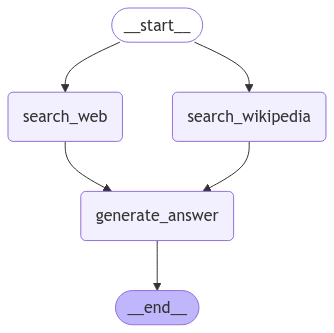

In [46]:

from langchain_community.document_loaders import WikipediaLoader
from langchain_community.tools.tavily_search import TavilySearchResults

def search_web(state):
    """ Retrieve docs from web search """

    # Search
    tavily_search = TavilySearchResults(max_results=3)
    search_docs = tavily_search.invoke(state['question'])

    # Format
    formatted_search_docs = "\n\n---\n\n".join(
        [
            f"<Document href='{doc["url"]}'/>\n{doc['content']}\n</Document>"
            for doc in search_docs
        ]
    )

    return {"context": [formatted_search_docs]}

def search_wikipedia(state):

    """ Retrieve docs from wikipedia """

    # Search
    search_docs = WikipediaLoader(query=state['question'],
                                  load_max_docs=2).load()

    # Format
    formatted_search_docs = "\n\n---\n\n".join(
        [
            f"<Document source='{doc.metadata["source"]}' page='{doc.metadata.get("page","")}'/>\n{doc.page_content}\n</Document>"
            for doc in search_docs
        ]
    )

    return {"context": [formatted_search_docs]}

def generate_answer(state):
    
    """ Node to answer a question """

    # Get state
    context = state["context"]
    question = state["question"]

    # Template
    answer_template = """Answer the question {question} using this context: {context}"""
    answer_instructions = answer_template.format(question=question, 
                                                       context=context)    
    
    # Answer
    # First variant:
    # answer = llm.invoke([SystemMessage(content=answer_instructions)]+[HumanMessage(content=f"Answer the question.")])

    # Second variant:
    #answer = llm.invoke([SystemMessage(content=answer_instructions),
    #                     HumanMessage(content=f"Answer the question.")
    #                    ])

    # Third (chain) variant:
    prompt_template = PromptTemplate.from_template("Answer the question {question} using this context: {context}")
    chain = prompt_template | llm

    answer = chain.invoke({"question": question, "context": context})
      
    # Append it to state
    return {"answer": answer}


# Add nodes
builder = StateGraph(State)

# Initialize each node with node_secret 
builder.add_node("search_web",search_web)
builder.add_node("search_wikipedia", search_wikipedia)
builder.add_node("generate_answer", generate_answer)

# Flow
builder.add_edge(START, "search_wikipedia")
builder.add_edge(START, "search_web")
builder.add_edge("search_wikipedia", "generate_answer")
builder.add_edge("search_web", "generate_answer")
builder.add_edge("generate_answer", END)
graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))



In [47]:
result = graph.invoke({"question": "How were Nvidia's Q2 2024 earnings"})
result['answer'].content

"Nvidia's Q2 2024 earnings were exceptionally strong, significantly surpassing revenue and earnings-per-share (EPS) estimates. The company's GAAP earnings per diluted share were reported at $2.48, marking an impressive increase of 854% year-over-year and 202% over the previous quarter. Nvidia's revenue for the quarter was $13.507 billion, driven largely by its data center business, which includes AI chips like the A100 and H100. The data center revenue alone was $10.32 billion, up 171% year-over-year. Additionally, the gaming division saw a 22% increase in revenue from the previous year, reaching $2.49 billion, which exceeded the average estimate of $2.38 billion. Overall, Nvidia's Q2 2024 financial results were a substantial beat over both revenue and EPS estimates."